In [1]:
import numpy as np
import pandas as pd
from DataProcessing import Data

In [2]:
d = Data()
d.get_index_names()

S&P 500: ['AAPL', 'ORCL', 'GOOGL', 'AMZN', 'BK', 'LIFE', 'T', 'XOM']
 VN: ['VHM', 'CTR', 'FPT', 'MBB']


['AAPL',
 'ORCL',
 'GOOGL',
 'AMZN',
 'BK',
 'LIFE',
 'T',
 'XOM',
 'VHM',
 'CTR',
 'FPT',
 'MBB']

In [3]:
chosen_index = 'AAPL'

In [4]:
d.preprocess(chosen_index)

Processing AAPL.csv
Saved AAPL data at data/processed/AAPL.csv


In [5]:
df = d.get_data(chosen_index)

In [6]:
df.head

<bound method NDFrame.head of             Date       Close     Volume        RSI        MFI         EMA   
0     2019-04-01   46.026634  111448000  67.268429  64.270909   45.237070  \
1     2019-04-02   46.695705   91062800  69.300647  63.761773   45.431555   
2     2019-04-03   47.015808   93087200  68.621752  63.849196   45.642788   
3     2019-04-04   47.097633   76457200  66.415042  62.339650   45.836768   
4     2019-04-05   47.412914   74106400  65.721236  61.764142   46.046921   
...          ...         ...        ...        ...        ...         ...   
1240  2024-03-05  170.119995   95132400  18.228278  16.817383  180.247559   
1241  2024-03-06  169.119995   68587700  18.143279  16.653482  178.763884   
1242  2024-03-07  169.000000   71765100  18.274975  16.636314  177.462033   
1243  2024-03-08  170.729996   76114600  25.466088  24.061516  176.564428   
1244  2024-03-11  172.750000   60068800  32.287898  30.180780  176.055837   

             SO        MACD  Next Day Price  

In [7]:
df.columns

Index(['Date', 'Close', 'Volume', 'RSI', 'MFI', 'EMA', 'SO', 'MACD',
       'Next Day Price'],
      dtype='object')

In [8]:
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
X = df[df.columns[1:8]].values
y = df[df.columns[8]].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)

In [11]:
TRAIN_PERCENT = 0.7
train_size = int(TRAIN_PERCENT*len(X))

X_train = X[0:train_size]
y_train = y[0:train_size]
X_test = X[train_size:len(X)]
y_test = y[train_size:len(y)]

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
model = SVR(kernel='sigmoid',gamma=0.002,C=150)
model.fit(X_train_scaled, y_train)

SVR(C=150, gamma=0.002, kernel='sigmoid')

In [14]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 7.291912726717819
Mean Absolute Error: 2.037168370113597
R-squared: 0.981141416572498


In [15]:
import matplotlib.pyplot as plt

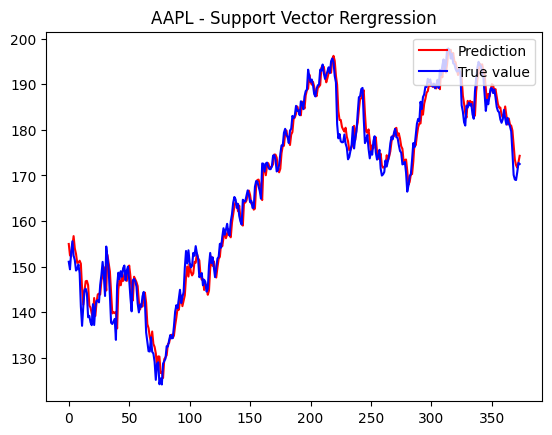

In [16]:
plt.plot(y_pred,color='red',label='Prediction')
plt.plot(y_test,color='blue',label='True value')
plt.legend(loc='upper right')
plt.title(f'{chosen_index} - Support Vector Rergression')
plt.show()